# Principal Component Analysis with Cancer Data

In [218]:
#Import all the necessary modules
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler

# Q1. Load the Data file ( Breast Cancer CSV) into Python DataFrame and view top 10 rows

In [183]:
#Loading the dataset
df_Can = pd.read_csv('breast-cancer-wisconsin-data.csv')

In [184]:
#creating copy so that original data remains unchanged. 
df_Cancer = df_Can

In [141]:
#View top 10 rows
df_Cancer.head(10)

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [6]:
  # Id columns is to identify rows hence can be skipped in analysis
  # All columns have numerical values
  # Class would be the target variable. Should be removed when PCA is done

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [7]:
df_Cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


Except 'Bare Nuclei' all other attributes are integer type. We will need to change the datatype of this to integer from object type. 

In [8]:
#Shape of the dataset
df_Cancer.shape

(699, 11)

It tells there are 11 columns and 699 rows.

###### Perform descriptive analysis

In [59]:
df_Cancer.describe().iloc[:,1:9].T[['mean','50%']]

,mean,50%
ClumpThickness,4.417740,4.0
Cell Size,3.134478,1.0
Cell Shape,3.207439,1.0
Marginal Adhesion,2.806867,1.0
Single Epithelial Cell Size,3.216023,2.0
Normal Nucleoli,3.437768,3.0
Bland Chromatin,2.866953,1.0
Mitoses,1.589413,1.0


ClumpThickness : slighty right  skewed 

Cell Size : right skewed

Cell Shape : right skewed

Marginal Adhesion : right skewed

Single Epithelial Cell Size : right skewed

Normal Nucleoli:  right skewed

Bland Chromatin : right skewed

Mitoses : right skewed

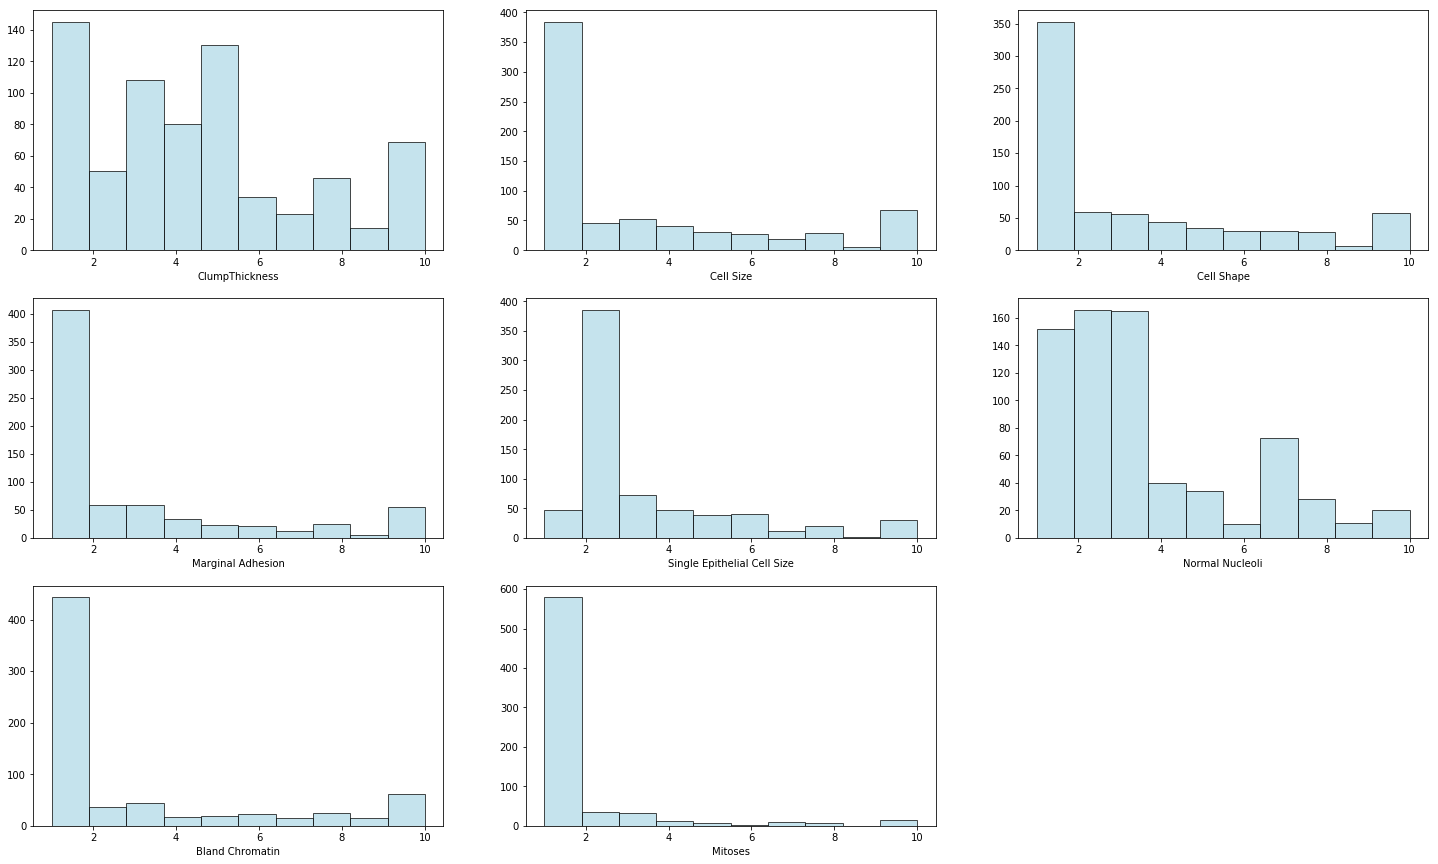

In [79]:
#Plots to see the distribution of the continuous features individually

plt.figure(figsize= (25,15))

plt.subplot(3,3,1)
plt.hist(df_Cancer.ClumpThickness, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('ClumpThickness')

plt.subplot(3,3,2)
plt.hist(df_Cancer['Cell Size'] , color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Cell Size')

plt.subplot(3,3,3)
plt.hist(df_Cancer['Cell Shape'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Cell Shape')

plt.subplot(3,3,4)
plt.hist(df_Cancer['Marginal Adhesion'] , color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Marginal Adhesion')

plt.subplot(3,3,5)
plt.hist(df_Cancer['Single Epithelial Cell Size'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Single Epithelial Cell Size')

plt.subplot(3,3,6)
plt.hist(df_Cancer['Normal Nucleoli'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Normal Nucleoli')

plt.subplot(3,3,7)
plt.hist(df_Cancer['Bland Chromatin'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Bland Chromatin')


plt.subplot(3,3,8)
plt.hist(df_Cancer['Mitoses'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Mitoses')

plt.show()

We can see from the plot that the skewness in the data.

# Q3 Check for missing value check, incorrect data, duplicate data and perform imputation with mean, median, mode as necessary.


In [93]:
# No missing values found. So let us try to remove ? from bare nuclei column

# Get count of rows having ?

df_Cancer.isnull().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

In [112]:
# We could see "?" values in column, this should be removed from data set

# Check for missing value in any other column
df_Cancer['Bare Nuclei'].value_counts()

1     402
10    132
5      30
2      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: Bare Nuclei, dtype: int64

In [118]:
# 16 values are corrupted. We can either delete them as it forms roughly 2% of data.
# Here we would like to impute it with suitable values

We found 16 '?' are present in the column.

In [185]:
df_Cancer['Bare Nuclei'].replace('?',np.nan,inplace = True)

In [186]:
#filling the nan value with mode.
df_Cancer['Bare Nuclei'].fillna(df_Cancer['Bare Nuclei'].mode().loc[0],inplace = True)

In [187]:
df_Cancer['Bare Nuclei'] = df_Cancer['Bare Nuclei'].astype(int)

In [188]:
#Check the datatype after conversion
df_Cancer['Bare Nuclei'].dtype 

dtype('int32')

In [189]:
#Check the count of duplicate records in the dataset
df_Cancer['Bare Nuclei'].duplicated().value_counts()

True     689
False     10
Name: Bare Nuclei, dtype: int64

In [190]:
#Removing the duplicate records.
df_Cancer.drop_duplicates(inplace = True)

In [191]:
# descriptive analysis for ['Bare Nuclei']
df_Cancer['Bare Nuclei'].describe().T[['mean','50%']]


mean    3.482609
50%     1.000000
Name: Bare Nuclei, dtype: float64

Bare Nuclei : right skewed

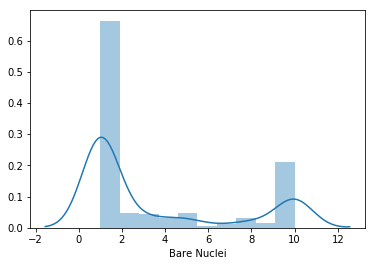

In [193]:
sns.distplot(df_Cancer['Bare Nuclei'])

In [111]:
#check the shape of data after removing duplicate records.
df_Cancer.shape

(690, 11)

In [194]:
#Id columns is to identify rows hence can be skipped in analysis
#Class would be the target variable. Should be removed when PCA is done
df_Cancer.drop(['ID'],axis = 1,inplace = True)

In [117]:
# Check the dataset again
df_Cancer.head(2)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences. 


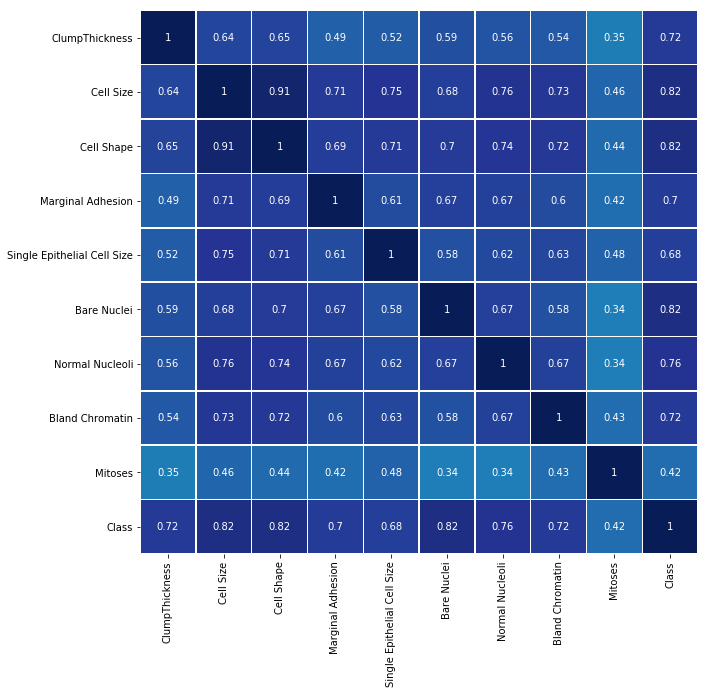

In [148]:
plt.figure(figsize=(10,10))
sns.heatmap(df_Cancer.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()

Obviously the value of the cell shape and cell size are highly correlated to each other. These have significant correlation with,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
and bland chromatin.

Target ['class'] is having significant relationship with all attributes except 'Mitoses'.


In [0]:
# Cell size shows high significance with cell shape,marginal adhesion, single epithelial cell size,bare nuclei, normal nucleoli 
# and bland chromatin
# Target variable shows high correlation with most of these variables

C:\Users\Paridhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Paridhi\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


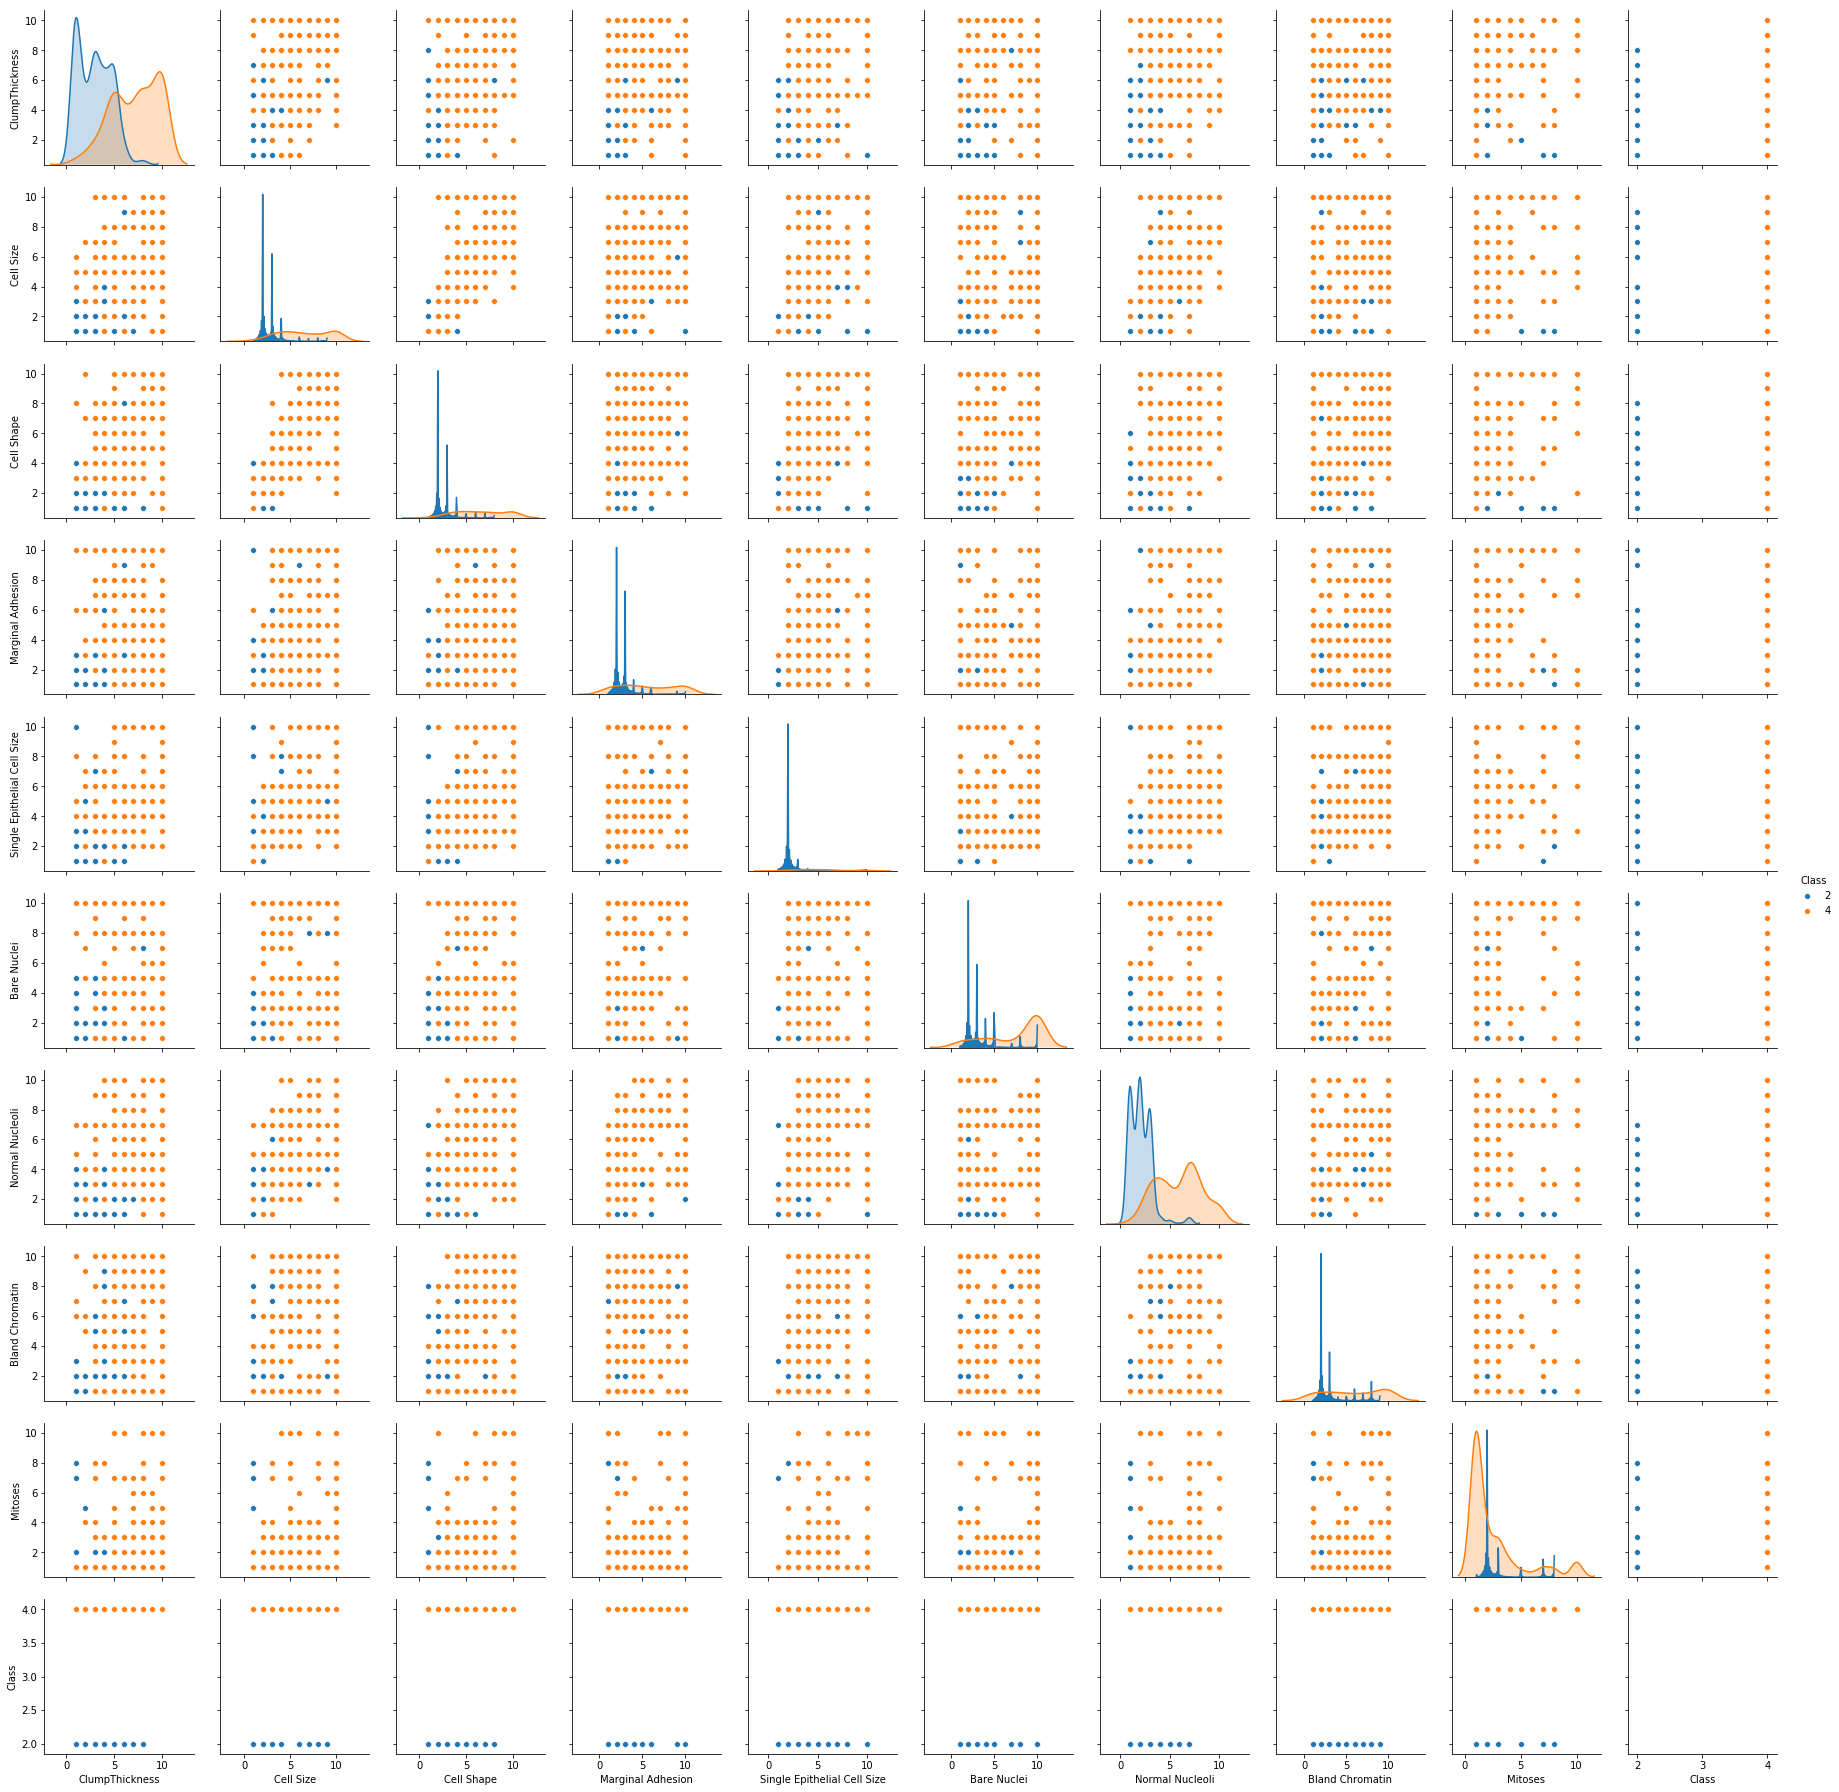

In [149]:
#Let us check for pair 
sns.pairplot(df_Cancer, hue='Class')

In [0]:
# Relationship between variables shows come correlation. 
# Distribution of variables shows most of the values are concentrated on lower side, though range remains same for all that is 
# Between 1 to 10

We find that the independent attributes are having relationship among each other which can be considered for impacting the model.Hence,we can perform PCA on this data.

# Q5 Remove any unwanted columns or outliers, standardize variables in pre-processing step

In [195]:
# We could see most of the outliers are now removed.

# Removing the target column
df_Class_X  = df_Cancer.iloc[:,0:9]



In [196]:
df_Cancer.head(1)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2


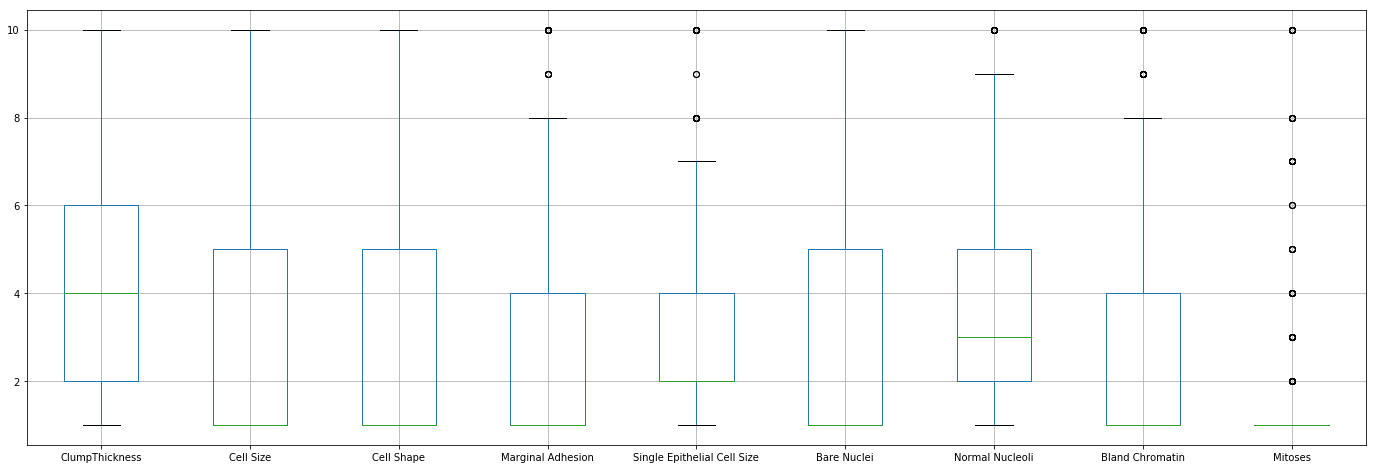

In [197]:
df_Class_X .boxplot(figsize=(24,8))

In [198]:
# identify outliers for Mitoses
iqr = np.subtract(*np.percentile(df_Cancer['Mitoses'], [75, 25]))
print('IQR: ',iqr)

q25, q75 = np.percentile(df_Cancer['Mitoses'], 25), np.percentile(df_Cancer['Mitoses'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Cancer['Mitoses'] if x < lower or x > upper]
print('Identified outliers for Mitoses out of 690: %d' % len(outliers))

IQR:  0.0
Identified outliers for Mitoses out of 690: 119


In [199]:
# identify outliers for Single Epithelial Cell Size
iqr = np.subtract(*np.percentile(df_Cancer['Single Epithelial Cell Size'], [75, 25]))
print('IQR: ',iqr)

q25, q75 = np.percentile(df_Cancer['Single Epithelial Cell Size'], 25), np.percentile(df_Cancer['Single Epithelial Cell Size'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Cancer['Single Epithelial Cell Size'] if x < lower or x > upper]
print('Identified outliers for Single Epithelial Cell Size out of 690 records: %d' % len(outliers))

IQR:  2.0
Identified outliers for Single Epithelial Cell Size out of 690 records: 52


In [200]:
# identify outliers for Marginal Adhesion
iqr = np.subtract(*np.percentile(df_Cancer['Marginal Adhesion'], [75, 25]))
print('IQR: ',iqr)


q25, q75 = np.percentile(df_Cancer['Marginal Adhesion'], 25), np.percentile(df_Cancer['Marginal Adhesion'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Cancer['Marginal Adhesion'] if x < lower or x > upper]
print('Identified outliers for Marginal Adhesion out of 690 records: %d' % len(outliers))

IQR:  3.0
Identified outliers for Marginal Adhesion out of 690 records: 60


In [201]:
# identify outliers for Normal Nucleoli
iqr = np.subtract(*np.percentile(df_Cancer['Normal Nucleoli'], [75, 25]))
print('IQR: ',iqr)


q25, q75 = np.percentile(df_Cancer['Normal Nucleoli'], 25), np.percentile(df_Cancer['Normal Nucleoli'], 75)
iqr = q75 - q25
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off

outliers = [x for x in df_Cancer['Normal Nucleoli'] if x < lower or x > upper]
print('Identified outliers for Normal Nucleoli out of 690 records: %d' % len(outliers))

IQR:  3.0
Identified outliers for Normal Nucleoli out of 690 records: 20


In [202]:
df_Cancer.columns

Index(['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli',
       'Bland Chromatin', 'Mitoses', 'Class'],
      dtype='object')

In [204]:
pd.crosstab(df_Cancer['Marginal Adhesion'],df_Cancer['Class'])


Class,2,4
Marginal Adhesion,,
1,369,31
2,37,19
3,31,27
4,5,28
5,4,19
6,4,18
7,0,13
8,0,25
9,1,4


In [205]:
# we see that freuency of 7,8,9,10 is very less hence imputing it. 
df_Cancer['Marginal Adhesion'] = np.where(df_Cancer['Marginal Adhesion'] > 4,4,df_Cancer['Marginal Adhesion'])

In [206]:
pd.crosstab(df_Cancer['Single Epithelial Cell Size'],df_Cancer['Class'])

Class,2,4
Single Epithelial Cell Size,,
1,44,1
2,359,23
3,29,42
4,7,41
5,5,34
6,2,39
7,3,9
8,2,18
9,0,2


In [207]:
df_Cancer['Single Epithelial Cell Size'] = np.where(df_Cancer['Single Epithelial Cell Size'] > 6,6,df_Cancer['Single Epithelial Cell Size'])

In [208]:
pd.crosstab(df_Cancer['Normal Nucleoli'],df_Cancer['Class'])

Class,2,4
Normal Nucleoli,,
1,149,2
2,158,7
3,125,35
4,8,32
5,4,30
6,1,9
7,7,64
8,0,28
9,0,11


In [209]:
df_Cancer['Normal Nucleoli'] = np.where(df_Cancer['Normal Nucleoli'] > 7,7,df_Cancer['Normal Nucleoli'])

In [210]:

#'Marginal Adhesion','Single Epithelial Cell Size','Normal Nucleoli','Bland Chromatin', 'Mitoses']
pd.crosstab(df_Cancer['Bland Chromatin'],df_Cancer['Class'])

Class,2,4
Bland Chromatin,,
1,396,40
2,30,6
3,12,30
4,1,17
5,2,17
6,4,18
7,2,14
8,4,20
9,1,15


In [211]:
df_Cancer['Bland Chromatin'] = np.where(df_Cancer['Bland Chromatin'] >3 ,3,df_Cancer['Bland Chromatin'])

In [212]:
pd.crosstab(df_Cancer['Mitoses'],df_Cancer['Class'])

Class,2,4
Mitoses,,
1,439,132
2,8,27
3,2,30
4,0,12
5,1,5
6,0,3
7,1,8
8,1,7
10,0,14


In [215]:
#Mitoses
df_Cancer['Mitoses'] = np.where(df_Cancer['Mitoses'] > 1,1,df_Cancer['Mitoses'])

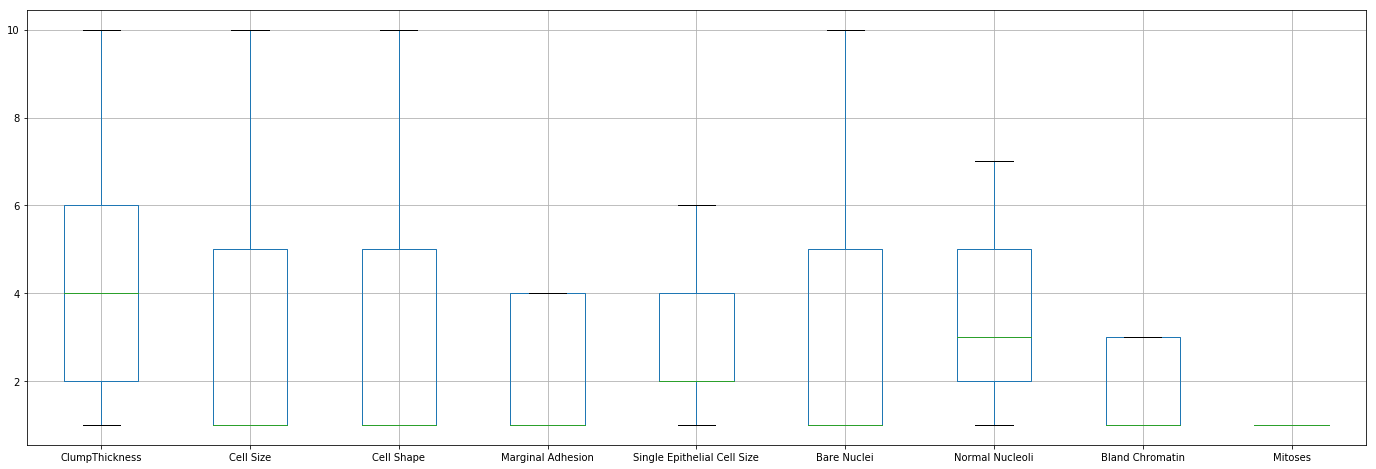

In [216]:
#Again check box plot
df_Class_X  = df_Cancer.iloc[:,0:9]
df_Class_X.boxplot(figsize=(24,8))

We don't find any outliers now.

In [226]:
#Standarization
scaler = StandardScaler()
X_std = scaler.fit_transform(df_Class_X)


C:\Users\Paridhi\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Paridhi\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


# Q6 Create a covariance matrix for identifying Principal components

In [227]:
# PCA
# Step 1 - Create covariance matrix

cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00145138 0.64410677 0.65453792 0.55329897 0.56014292 0.59150555
  0.57632311 0.57634855 0.        ]
 [0.64410677 1.00145138 0.9066632  0.72204998 0.78736392 0.68556472
  0.74749076 0.70714438 0.        ]
 [0.65453792 0.9066632  1.00145138 0.7042574  0.75864187 0.70518656
  0.73047144 0.69759258 0.        ]
 [0.55329897 0.72204998 0.7042574  1.00145138 0.6675427  0.69693138
  0.68237584 0.63542419 0.        ]
 [0.56014292 0.78736392 0.75864187 0.6675427  1.00145138 0.64591131
  0.67167598 0.67807568 0.        ]
 [0.59150555 0.68556472 0.70518656 0.69693138 0.64591131 1.00145138
  0.69379705 0.63062452 0.        ]
 [0.57632311 0.74749076 0.73047144 0.68237584 0.67167598 0.69379705
  1.00145138 0.66986041 0.        ]
 [0.57634855 0.70714438 0.69759258 0.63542419 0.67807568 0.63062452
  0.66986041 1.00145138 0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]]


# Q7 Identify eigen values and eigen vector

In [228]:
# Step 2- Get eigen values and eigen vector

In [229]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[ 3.13618288e-01  1.05413507e-02 -9.20770589e-01 -2.58627849e-02
   1.89938961e-01 -2.53158948e-02  9.23607112e-02  8.82999635e-02
   0.00000000e+00]
 [ 3.82675693e-01  7.36203030e-01  6.81808295e-02  3.14500353e-01
  -3.29153333e-01 -2.92082935e-01  7.24213913e-02 -9.54258905e-02
   0.00000000e+00]
 [ 3.79917335e-01 -6.64509265e-01  9.55371775e-03  2.68580472e-01
  -4.83914070e-01 -3.04115024e-01 -1.49189599e-02 -1.22401640e-01
   0.00000000e+00]
 [ 3.47721800e-01 -4.30835948e-02  2.48579929e-01 -4.30576471e-01
   3.18357956e-02 -1.51151431e-01  5.26845763e-01  5.73252601e-01
   0.00000000e+00]
 [ 3.55264973e-01 -7.81020559e-02  2.36611153e-01  4.02022583e-01
   6.66409226e-01 -1.57993051e-01 -3.58624842e-01  2.28921462e-01
   0.00000000e+00]
 [ 3.46457121e-01  7.82642595e-02  3.19888682e-02 -6.25991122e-01
  -1.50588701e-01  6.21879737e-03 -6.74398392e-01 -5.85249865e-02
   0.00000000e+00]
 [ 3.54904805e-01 -4.73261225e-02  1.56862301e-01 -1.93576685e-01
   3.40865

# Q8 Find variance and cumulative variance by each eigen vector

In [230]:
# Step 3 (continued): Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(5.764543764369535, array([0.31361829, 0.38267569, 0.37991733, 0.3477218 , 0.35526497,
       0.34645712, 0.3549048 , 0.34315025, 0.        ])), (0.4951548043811603, array([-0.92077059,  0.06818083,  0.00955372,  0.24857993,  0.23661115,
        0.03198887,  0.1568623 ,  0.06352744,  0.        ])), (0.4284316204350649, array([-0.02586278,  0.31450035,  0.26858047, -0.43057647,  0.40202258,
       -0.62599112, -0.19357669,  0.22788177,  0.        ])), (0.36818998482428444, array([-0.02531589, -0.29208293, -0.30411502, -0.15115143, -0.15799305,
        0.0062188 ,  0.12058449,  0.87130527,  0.        ])), (0.31645136959015485, array([ 0.08829996, -0.09542589, -0.12240164,  0.5732526 ,  0.22892146,
       -0.05852499, -0.74431202,  0.17223738,  0.        ])), (0.29399019556352735, array([ 0.09236071,  0.07242139, -0.01491896,  0.52684576, -0.35862484,
       -0.67439839,  0.35354576,  0.00400461,  0.        ])), (0.2539630766744812, array([ 0.18993896, -0.32915333, -0.48391407,  0.031835

In [231]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 8 entries as there are 8 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 8 entries with 8 th entry 
# cumulative reaching almost 100%
print('var_explained:',var_explained)
print('cum_var_exp:',cum_var_exp)

var_explained: [0.7195236691396031, 0.061804648590329594, 0.05347633813039124, 0.04595704701882825, 0.039499093052104466, 0.03669551535204172, 0.03169937678056477, 0.011344311936136768, 0.0]
cum_var_exp: [0.71952367 0.78132832 0.83480466 0.8807617  0.9202608  0.95695631
 0.98865569 1.         1.        ]


In [233]:
df_Class_X.head(2)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
0,5,1,1,1,2,1,3,1,1
1,5,4,4,4,6,10,3,2,1


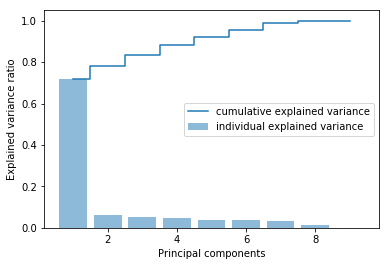

In [234]:
plt.bar(range(1,10), var_explained, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,10),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

# Q9 Use PCA command from sklearn and find Principal Components. Transform data to components formed

In [236]:
pca = PCA(n_components= 7)
pca.fit(X_std)
#pd.DataFrame(pca.components_,columns = list(X_std))

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [237]:
columns=list(df_Cancer.columns)
print(columns)
del columns[9]
print(columns)

['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli', 'Bland Chromatin', 'Mitoses', 'Class']
['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Normal Nucleoli', 'Bland Chromatin', 'Mitoses']


In [238]:
#df_PCA = pd.DataFrame(pca.components_,columns=list(columns))
df_PCA = pd.DataFrame(pca.components_)

In [239]:
df_PCA.shape

(7, 9)

In [240]:
print(pca.components_)

[[ 0.31361829  0.38267569  0.37991733  0.3477218   0.35526497  0.34645712
   0.3549048   0.34315025 -0.        ]
 [ 0.92077059 -0.06818083 -0.00955372 -0.24857993 -0.23661115 -0.03198887
  -0.1568623  -0.06352744  0.        ]
 [-0.02586278  0.31450035  0.26858047 -0.43057647  0.40202258 -0.62599112
  -0.19357669  0.22788177 -0.        ]
 [ 0.02531589  0.29208293  0.30411502  0.15115143  0.15799305 -0.0062188
  -0.12058449 -0.87130527  0.        ]
 [ 0.08829996 -0.09542589 -0.12240164  0.5732526   0.22892146 -0.05852499
  -0.74431202  0.17223738 -0.        ]
 [-0.09236071 -0.07242139  0.01491896 -0.52684576  0.35862484  0.67439839
  -0.35354576 -0.00400461 -0.        ]
 [ 0.18993896 -0.32915333 -0.48391407  0.0318358   0.66640923 -0.1505887
   0.3408658  -0.19346116  0.        ]]


# Q10 Find correlation between components and features

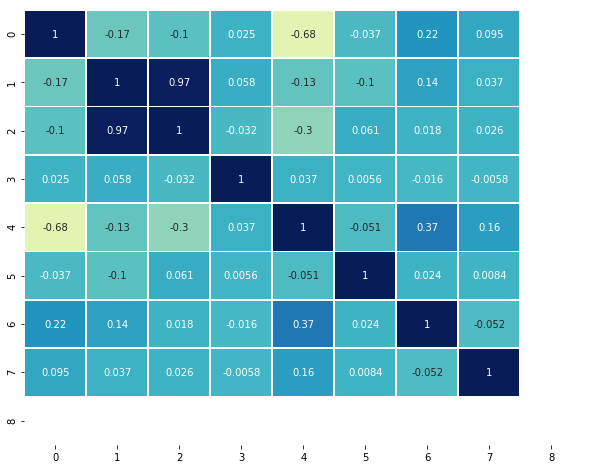

In [241]:
# Lets plot heatmap for PCA components and check the correlation between the new attributes.

plt.figure(figsize=(10,8))
sns.heatmap(df_PCA.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")
plt.show()


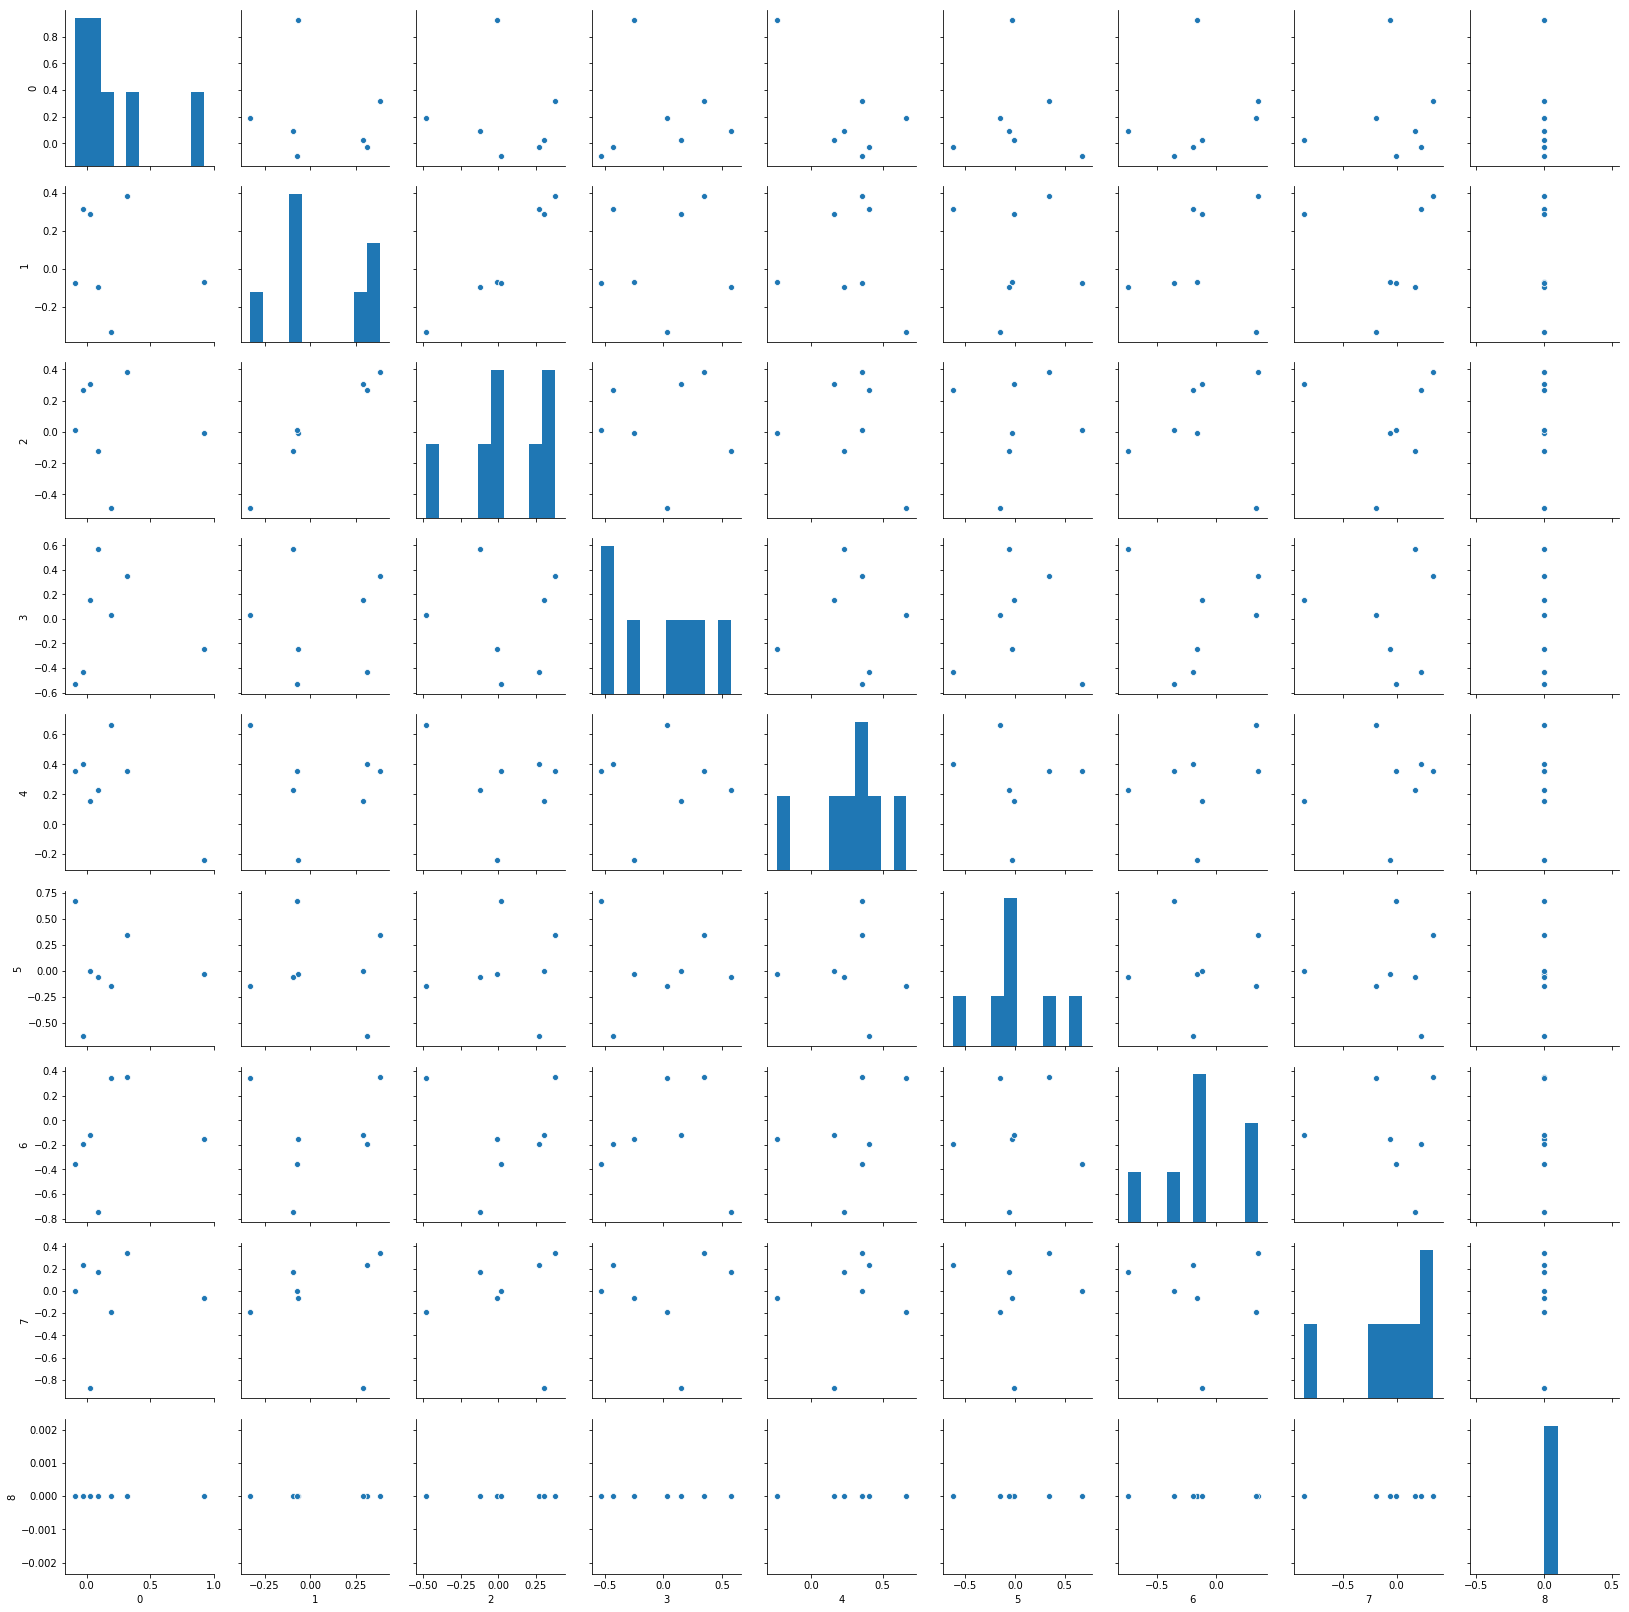

In [242]:
#lets check the PCA components correlation
sns.pairplot(df_PCA)

We find no correlation among the components.

# Popularity Based Recommendation System

### About Dataset

Anonymous Ratings on jokes.

1. Ratings are real values ranging from -10.00 to +10.00 (the value "99" corresponds to "null" = "not rated").

2. One row per user

3. The first column gives the number of jokes rated by that user. The next 100 columns give the ratings for jokes 01 - 100.

# Q11 Read the dataset(jokes.csv)


In [243]:
df_Jokes = pd.read_csv('jokes.csv')

In [244]:
df_Jokes.shape

(24983, 101)

In [245]:
df_Jokes.head(2)

,NumJokes,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,74,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,100,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07


# Q12 Consider `ratings` named dataframe with only first 200 rows and all columns from 1(first column is 0) of dataset

In [249]:
ratings = df_Jokes.iloc[:200,1:]

In [250]:
ratings.head(2)

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07


In [251]:
ratings.shape

(200, 100)

# Q13 In the dataset, the null ratings are given as 99.00, so replace all 99.00s with 0
Hint: You can use `ratings.replace(<the given value>, <new value you wanted to change with>)`

In [253]:
#Count the how many rating in each column having '99' value.
ratings[ratings == 99.00].count()

Joke1       59
Joke2       37
Joke3       70
Joke4       93
Joke5        0
Joke6       60
Joke7        0
Joke8        0
Joke9       84
Joke10      32
Joke11      37
Joke12      40
Joke13       0
Joke14      35
Joke15       0
Joke16       0
Joke17       0
Joke18       0
Joke19       0
Joke20       0
Joke21       3
Joke22      34
Joke23      39
Joke24      86
Joke25      28
Joke26      15
Joke27       1
Joke28      10
Joke29       2
Joke30      63
          ... 
Joke71     131
Joke72     135
Joke73     136
Joke74     136
Joke75     138
Joke76     136
Joke77     137
Joke78     134
Joke79     135
Joke80     136
Joke81     131
Joke82     132
Joke83     132
Joke84     133
Joke85     129
Joke86     128
Joke87     128
Joke88     130
Joke89     135
Joke90     125
Joke91     134
Joke92     129
Joke93     125
Joke94     125
Joke95     129
Joke96     129
Joke97     121
Joke98     133
Joke99     123
Joke100    133
Length: 100, dtype: int64

In [254]:
#Replacing all the 99 values with 0 

ratings.replace(99.00,0.00,inplace = True)

In [255]:
ratings.head()

,Joke1,Joke2,Joke3,Joke4,Joke5,Joke6,Joke7,Joke8,Joke9,Joke10,...,Joke91,Joke92,Joke93,Joke94,Joke95,Joke96,Joke97,Joke98,Joke99,Joke100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,...,2.82,0.00,0.00,0.00,0.00,0.00,-5.63,0.00,0.00,0.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,...,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,0.00,0.00,0.00,0.00,9.03,9.27,9.03,9.27,0.00,0.00,...,0.00,0.00,0.00,9.08,0.00,0.00,0.00,0.00,0.00,0.00
3,0.00,8.35,0.00,0.00,1.80,8.16,-2.82,6.21,0.00,1.84,...,0.00,0.00,0.00,0.53,0.00,0.00,0.00,0.00,0.00,0.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,...,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60


### Popularity based recommendation system

# Q14  Find the mean for each column  in `ratings_diff` i.e, for each joke
Consider all the mean ratings and find the jokes with highest mean value and display the top 10 joke IDs.

In [462]:
ratings_diff = ratings.describe().iloc[1,:].sort_values(ascending = False).head(10)

In [463]:
ratings_diff

Joke50    4.05540
Joke36    3.61150
Joke53    3.57150
Joke35    3.22315
Joke29    3.18995
Joke27    3.05240
Joke62    2.86185
Joke49    2.85000
Joke32    2.77955
Joke31    2.65710
Name: mean, dtype: float64

Above are the top 10 Jokes with the highest mean value.